# CH05. 퍼셉트론 (perceptron) (실습)

### [1] 실습 진행 관련 설명
퍼셉트론에 대한 실습을 진행하고자 한다. 실습은 크게 두가지로 구성되어 있다.

- sklearn 라이브러리를 이용한 방법
- 직접 함수를 구현하는 방법

우선 sklearn 라이브러리를 이용한 방법을 실습하고 그 이후에 직접 함수를 구현하여 실습을 진행한다.

## [2] 코드 구현의 흐름

-(1) (데이터 측면) 데이터 불러오기.

-(2) (데이터 측면) 불러온 데이터를 훈련데이터와 테스트 데이터로 구분하기.

-(3) (모델 측면) sklearn 라이브러리의 퍼셉트론 모델 불러오기. 또는 직접 함수 구현하기.

-(4) (학습 과정) 모델 학습하기.

-(5) (성능 평가) 테스트 데이터를 이용한 모델의 성능 평가 및 시각화.

## (첫번째 실습) sklearn 라이브러리를 이용한 방법




**데이터 설명**
퍼셉트론 학습을 통해 0 - 9의 숫자에 대한 필기체 이미지를 인식하여 주어진 이미지의 소속 클래스(숫자)를 예측하는 **분류** 작업을 수행한다.

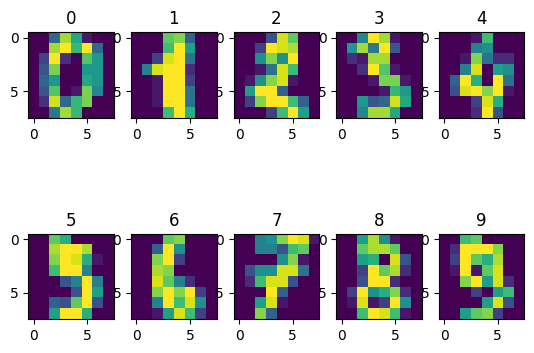

In [ ]:
'''
(1) (데이터 측면) 데이터 불러오기.
필기체 숫자 데이터
0에서 9까지 총 10개의 숫자 필기체 이미지 (1997장의 이미지)
8X8 = 64개의 특성으로 표시되며, 개별 특성은 0-16의 정수값 부여.
'''
from sklearn.datasets import load_digits      # 학습 데이터 불러오기
from sklearn.linear_model import Perceptron
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

X, y = load_digits(return_X_y=True)

'''
데이터셋 시각화
상단의 숫자는 정답값(y)를 의미하며, 이미지는 64개로 이루어진 특징벡터를 의미함.
'''
rows = 2; cols = 5
fig = plt.figure()
for i in range(10):
  ax = fig.add_subplot(rows, cols, i+1)
  ax.imshow(X[i].reshape(8,8))
  ax.set_title(str(i))
plt.show()

**모델의 학습과 예측**

훈련용 데이터와 테스트용 데이터를 확보한 후 fit() 명령으로 모델을 학습하고, predict() 명령으로 예측 작업을 수행한다.

In [ ]:
'''
(2) (데이터 측면) 훈련 데이터셋과 테스트 데이터셋을 구분하기
X(특징벡터)와 y(정답값)을 훈련데이터셋과 테스트데이터셋으로 분할한다.
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
'''
(3) (모델 측면) 퍼셉트론 모델 불러오기
sklearn 라이브러리를 통해 구현되어 있는 퍼셉트론 모델을 불러온다.
'''
classifier = Perceptron()

In [ ]:
'''
(4) (학습 과정) 모델 학습 하기
fit을 통해 모델을 학습한다.
fit 함수에는 1) 가중치 초기화 2) 손실함수 계산 3) 가중치 업데이트가 모두 구현되어 있다.
'''
classifier.fit(X_train, y_train)
w = classifier.coef_
w_0 = classifier.intercept_
#print(w)
#print(w_0)

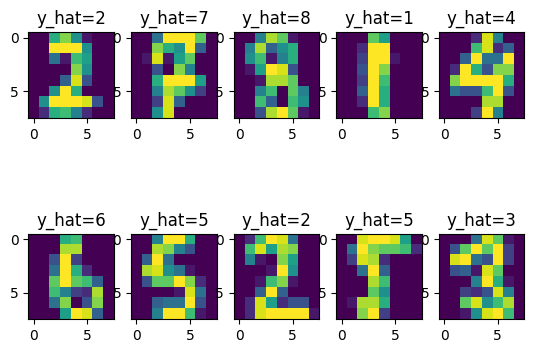

In [ ]:
'''
(5) (성능 평가) 학습된 모델을 대상으로 테스트 데이터로 평가하기
predict를 통해 퍼셉트론으로 얻은 예측값을 추출한다.
'''
y_pred = classifier.predict(X_test)  # 테스트 데이터에 대하여 결과 예측

'''
학습 결과 시각화
상단의 숫자는 정답값(y)를 의미하며, 이미지는 64개로 이루어진 특징벡터를 의미함.
'''
rows = 2; cols = 5
fig = plt.figure()
fig.tight_layout(w_pad=100)
for i in range(10):
  ax = fig.add_subplot(rows, cols, i+1)
  ax.imshow(X_test[i].reshape(8,8))
  ax.set_title("y_hat=" + str(y_pred[i]))
plt.show()

**분류 성능 평가와 시각화**

Confusion matrix

학습 모델의 분류 성능을 시각적으로 확인할 수 있게 해준다. 특히 목표 클래스에 해당하는 테스트 인스턴스에 대하여 모델이 정확하게 예측한 이미지의 수, 잘못 예측한 이미지들의 경우 클래스(숫자) 별로 잘못 예측한 이미지의 숫자를 표시하여 모델의 분류 성능을 한 눈에 파악할 수 있게 해 준다.

              precision    recall  f1-score   support

     digit 0       1.00      1.00      1.00        44
     digit 1       0.89      0.98      0.93        42
     digit 2       0.96      0.98      0.97        47
     digit 3       0.97      0.97      0.97        58
     digit 4       1.00      0.98      0.99        49
     digit 5       0.97      0.87      0.92        45
     digit 6       0.92      1.00      0.96        36
     digit 7       0.94      1.00      0.97        46
     digit 8       0.94      0.84      0.89        38
     digit 9       0.95      0.93      0.94        45

    accuracy                           0.96       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.96      0.96      0.96       450



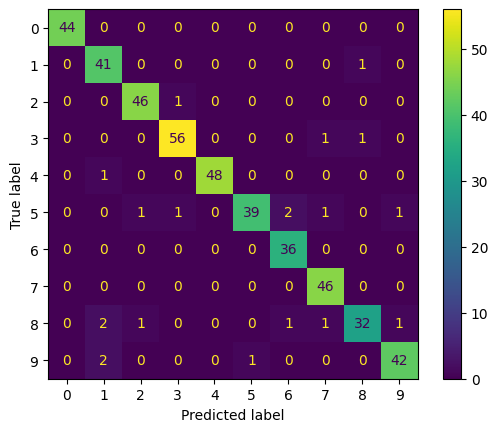

In [ ]:
'''
(5-2) (성능 평가) 학습된 모델을 대상으로 테스트 데이터로 평가하기
혼동행렬을 통한 성능 확인
'''
from sklearn.metrics import classification_report
target_names = ['digit 0', 'digit 1', 'digit 2', 'digit 3', 'digit 4',
                'digit 5', 'digit 6', 'digit 7', 'digit 8', 'digit 9']
print(classification_report(y_test, y_pred, target_names=target_names))

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

## (두번째 실습) 직접구현


In [ ]:
'''
(1) (데이터 측면) 데이터 불러오기.
필기체 숫자 데이터
0에서 9까지 총 10개의 숫자 필기체 이미지 (1997장의 이미지)
8X8 = 64개의 특성으로 표시되며, 개별 특성은 0-16의 정수값 부여.
'''
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
import numpy as np

X, y = load_digits(return_X_y=True)

In [ ]:
'''
(2) (데이터 측면) 훈련 데이터셋과 테스트 데이터셋을 구분하기
X(특징벡터)와 y(정답값)을 훈련데이터셋과 테스트데이터셋으로 분할한다.
직접 구현부에서는 10개의 숫자 분류가 아닌 이진분류를 진행한다.
따라서 이에 맞는 형태의 데이터로 변환이 필요하다.
'''
def divideData(X, y, targetClass):
    idx = np.where(y==targetClass)[0]
    newY = np.zeros(len(y))
    newY[idx] = 1
    X_train, X_test, y_train, y_test = train_test_split(X, newY, test_size = 0.25, random_state = 42)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = divideData(X, y, 3)

In [ ]:
'''
(3) (모델 측면) 퍼셉트론 모델 불러오기
퍼셉트론 모델 학습을 위해 필요한 다양한 함수들을 선언한다.
'''
m, n = X_train.shape
w = np.zeros((n,1))
lr = 0.1
y_train = y_train.reshape(m,1)

def sigmoid(x): # sigmoid 함수 구현
    return 1.0/(1 + np.exp(-x))

def BCE_loss(y, y_hat):
    loss = np.mean(y*(np.log1p(y_hat)) + (1-y)*np.log1p(1-y_hat))
    return -loss

def gradient_descent(X, y, y_hat):
    global w
    dw = -(np.dot(X.T, (y-y_hat)))
    w -= lr*dw

In [ ]:
'''
(4) (학습 과정) 모델 학습 하기
(3)에서 구현한 함수를 통해 모델을 학습한다.
1) 가중치 초기화 2) 손실함수 계산 3) 가중치 업데이트를 모두 사용한다.
'''
for epoch in range(100):
    y_hat = sigmoid(np.dot(X_train, w))
    loss = BCE_loss(y_train, y_hat)
    gradient_descent(X_train, y_train, y_hat)
print(w)

[[ 0.00000000e+00]
 [-8.40849119e+00]
 [-1.07435274e+02]
 [-8.21119504e+00]
 [ 3.56011188e+02]
 [ 1.24255781e+02]
 [-5.11151984e+01]
 [-1.40895081e+01]
 [-7.30006099e+00]
 [-1.79092126e+01]
 [ 1.90420128e+02]
 [-4.77229876e+01]
 [ 1.05173489e+02]
 [ 3.41793587e+02]
 [ 1.70067352e+02]
 [-8.62524073e+00]
 [ 2.50000000e-01]
 [-6.71563119e+01]
 [-4.73228341e+02]
 [-3.88701297e+02]
 [ 3.05665811e+02]
 [-1.94451957e+02]
 [-9.03141558e+01]
 [-7.06646216e+00]
 [-1.00000000e-01]
 [-1.88798221e+02]
 [-6.22337517e+02]
 [-1.86604808e+01]
 [ 1.12604484e+02]
 [-5.04065510e+02]
 [-3.39907042e+02]
 [-1.50000000e-01]
 [ 0.00000000e+00]
 [-1.29364786e+02]
 [-2.76605387e+02]
 [-6.28167634e+01]
 [ 2.46948723e+02]
 [ 2.79733008e+01]
 [-1.25512709e+02]
 [ 0.00000000e+00]
 [-7.50000000e-01]
 [-7.16474852e+00]
 [-3.63622095e+02]
 [-7.58604391e+02]
 [ 1.85036522e+01]
 [ 3.76507404e+02]
 [ 3.78869963e+02]
 [-2.20000000e+00]
 [-6.00000000e-01]
 [-2.37400796e+00]
 [-2.74949623e+01]
 [-1.90163104e+02]
 [-3.8885181

<ipython-input-9-5a886fa58a63>:11: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-x))


<ipython-input-9-5a886fa58a63>:11: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-x))


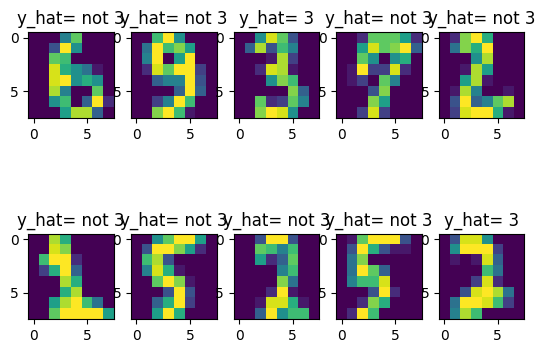

In [ ]:
'''
(5) (성능 평가) 학습된 모델을 대상으로 테스트 데이터로 평가하기
sklearn 라이브러리와 동일
'''
def predict(X, w):
    preds = sigmoid(np.dot(X, w))
    pred_class = []
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    return np.array(pred_class)

y_pred = predict(X_test, w)

'''
학습 결과 시각화
상단의 숫자는 정답값(y)를 의미하며, 이미지는 64개로 이루어진 특징벡터를 의미함.
'''
rows = 2; cols = 5
fig = plt.figure()
for i in range(10):
  ax = fig.add_subplot(rows, cols, i+1)
  ax.imshow(X_test[i].reshape(8,8))
  if y_pred[i] == 1:
    ax.set_title("y_hat= 3")
  else:
    ax.set_title("y_hat= not 3")
plt.show()

              precision    recall  f1-score   support

     digit 3       1.00      0.98      0.99       404
      Others       0.85      0.98      0.91        46

    accuracy                           0.98       450
   macro avg       0.92      0.98      0.95       450
weighted avg       0.98      0.98      0.98       450



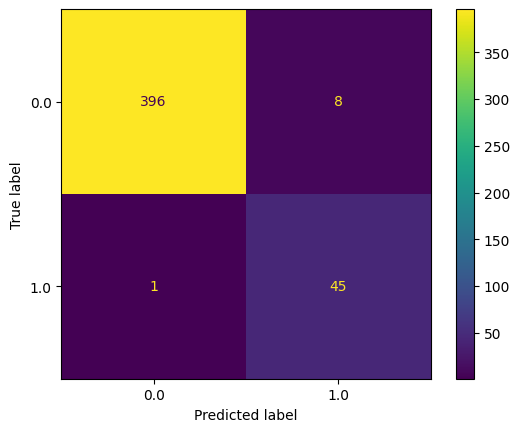

In [ ]:
'''
(5-2) (성능 평가) 학습된 모델을 대상으로 테스트 데이터로 평가하기
혼동행렬을 통한 성능 확인
'''
from sklearn.metrics import classification_report
target_names = ['digit 3', 'Others']
print(classification_report(y_test, y_pred, target_names=target_names))

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)